## 使用Pandas和Seaborn绘图
- Line
- Bar
    - cross-tabulation
    - seaborn
- Histograms 和 Density Plots
- Scatter 或 Point Plots
- Facet grids 和 categorical data

pandas itself has built-in methods which simplify creating visualizations from DataFrame and Series objects. Another library we will use is seaborn (https://seaborn.pydata.org/), a statistical graphics library created by Michael Waskom. 

## Line
Series and DataFrame each have a `plot` attribute for making some basic plot types.

In [11]:
# coding:utf-8
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pwd

u'/Users/zhangjun/Documents/machine-learning-notes/data-processing'

In [12]:
%matplotlib inline

In [13]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     1.003018
10    0.238213
20   -1.300580
30   -0.937447
40   -1.166405
50   -0.172441
60    1.984631
70    1.890542
80    0.601973
90   -0.103562
dtype: float64

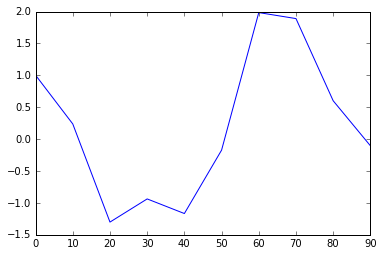

In [14]:
s.plot()

Most of pandas’s plotting methods accept an optional `ax` parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

DataFrame’s `plot` method plots each of its columns as a different line on the same subplot, creating a legend automatically:

In [15]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.072515,-0.404247,0.331816,-0.398213
10,-1.135331,-0.559335,0.698961,-0.778514
20,-2.360971,-1.430557,0.999133,-0.587136
30,-2.694610,-2.752692,-0.019943,-0.739733
40,-3.038866,-5.128968,0.948508,-1.850560
50,-1.513337,-6.872332,0.851630,-1.889010
60,-1.119018,-4.856343,-0.180210,-2.046150
70,-0.988229,-4.407587,-1.209934,-2.177711
80,-2.138213,-5.619940,-0.387827,-0.610166
90,-2.700664,-5.197001,-2.198236,-1.091926


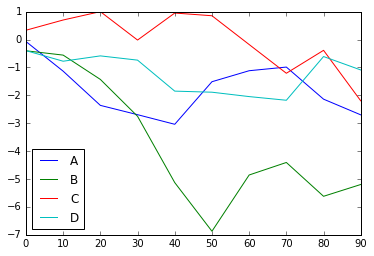

In [16]:
df.plot()

Figure 9-13. Simple DataFrame plot example

`df.plot()` is equivalent to `df.plot.line()`.

Table 9-3. Series.plot method arguments

Argument | Description
---------|------------
label | Label for plot legend
ax | matplotlib subplot object to plot on. If nothing passed, uses active matplotlib subplot
style | Style string, like 'ko--', to be passed to matplotlib.
alpha | The plot fill opacity (from 0 to 1)
kind | Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
logy | Use logarithmic scaling on the Y axis
use_index | Use the object index for tick labels
rot | Rotation of tick labels (0 through 360)
xticks | Values to use for X axis ticks
yticks | Values to use for Y axis ticks
xlim | X axis limits (e.g. [0, 10])
ylim | Y axis limits
grid | Display axis grid (on by default)

Table 9-4. DataFrame-specific plot arguments

Argument | Description
---------|------------
subplots | Plot each DataFrame column in a separate subplot
sharex | If subplots=True, share the same X axis, linking ticks and limits
sharey | If subplots=True, share the same Y axis
figsize | Size of figure to create as tuple
title | Plot title as string
legend | Add a subplot legend (True by default)
sort_columns | Plot columns in alphabetical order; by default uses existing column order

## Bar
The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respectively.

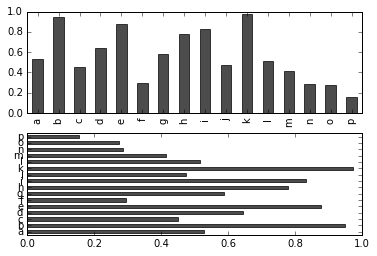

In [18]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. 

In [19]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.011601,0.225671,0.989691,0.374079
two,0.395884,0.062333,0.619908,0.668546
three,0.650843,0.096523,0.705714,0.828573
four,0.127957,0.702500,0.746830,0.026331
five,0.815430,0.163756,0.464481,0.689502
six,0.830152,0.293228,0.416865,0.434060


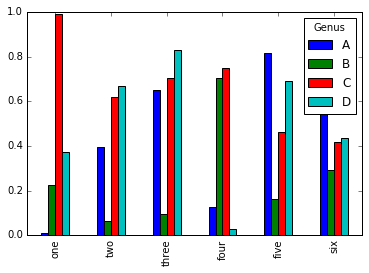

In [20]:
df.plot.bar()

Stacked bar plots are created from a DataFrame by passing `stacked=True`, resulting in the value in each row being stacked together:

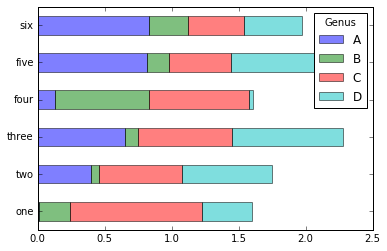

In [21]:
df.plot.barh(stacked=True, alpha=0.5)

A useful recipe for bar plots is to visualize a Series’s value frequency using `value_counts`: `s.value_counts().plot.bar()`

I load the data using read_csv and make a `cross-tabulation` by day and party size:

In [22]:
tips = pd.read_csv('data/dataload/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [23]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

In [24]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [25]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


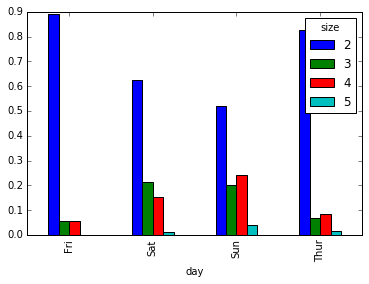

In [26]:
party_pcts.plot.bar()

With data that requires aggregation or summarization before making a plot, using the `seaborn` package can make things much simpler.

In [28]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


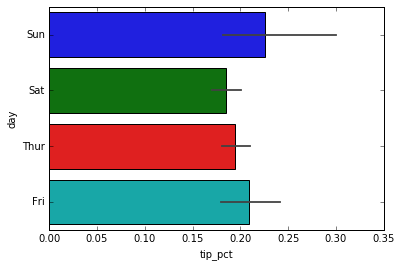

In [29]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

The black lines drawn on the bars represent the `95% confidence interval` (this can be configured through optional arguments).

`seaborn.barplot` has a `hue` option which enables us to split by an additional categorical value:

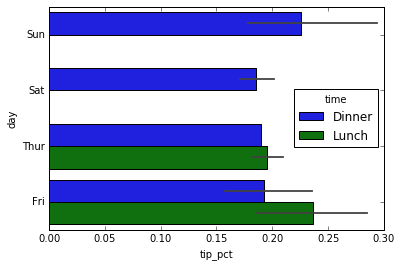

In [30]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using `seaborn.set`:

In [31]:
sns.set(style="whitegrid")

## Histograms 和 Density Plots
Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the `plot.hist` method on the Series:

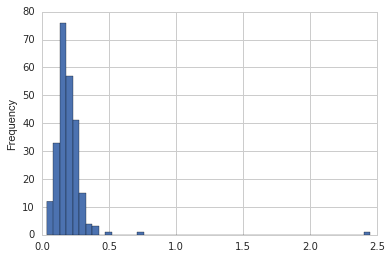

In [32]:
tips['tip_pct'].plot.hist(bins=50)

Using `plot.kde`(KDE (kernel density estimate) ) makes a density plot using the conventional mixture-of-normals estimate:

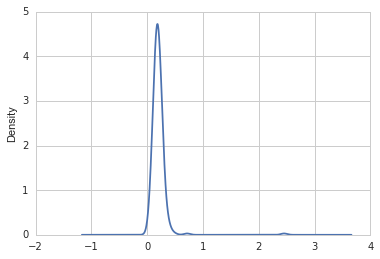

In [33]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its `distplot` method, which can plot both a histogram and a continuous density estimate simultaneously.

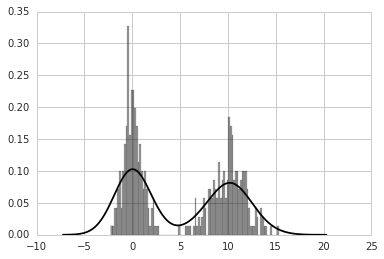

In [34]:
comp1 = np.random.normal(0, 1, size=200)  # Normal(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # Normal(10, 4)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## Scatter 或 Point Plots

In [35]:
macro = pd.read_csv('data/dataload/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


I use seaborn’s `regplot` method, which make a scatter plot and fits a linear regression line (see Figure 9-23):

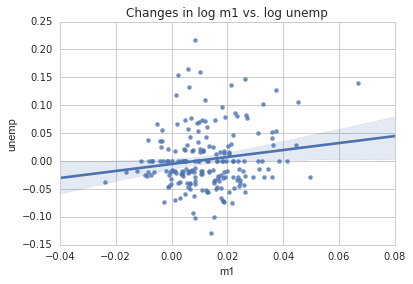

In [36]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a `pairs plot` or `scatter plot matrix`. Making such a plot from scratch is a bit of work, so Seaborn has a convenient pairplot function. It supports placing histograms or density estimates of each variable along the diagonal. See Figure 9-24 for the resulting plot:


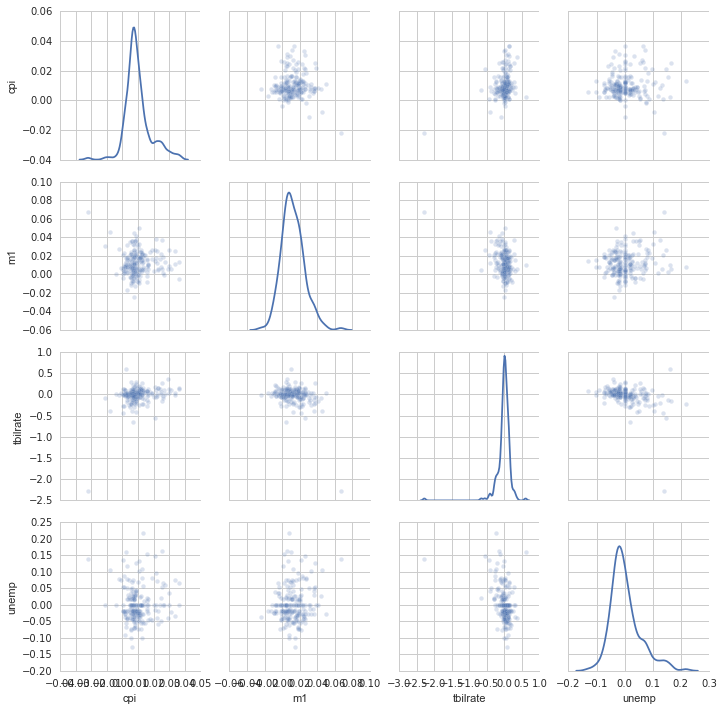

In [37]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Facet grids 和 categorical data
One way to visualize data with many categorical variables is to use a `facet grid`. Seaborn has a useful built-in function `factorplot` that simplifies making many kinds of faceted plots:

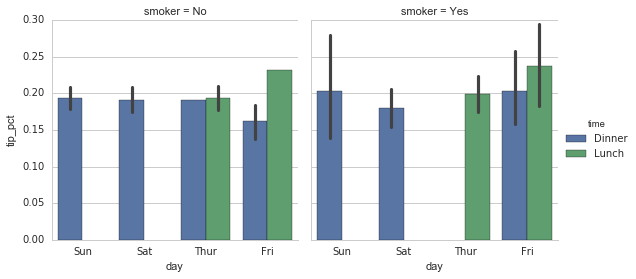

In [38]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by `time` by different bar colors within a facet, we can also expand the facet grid by adding one row per time value:

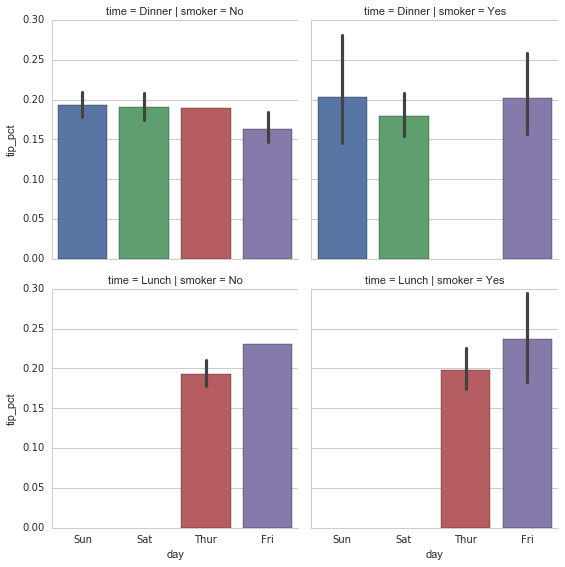

In [39]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

`factorplot` supports other plot types which may be useful depending on what you are trying to display. For example, `box plots` (which show the median, quartiles, and outliers) can be an effective visualization type:

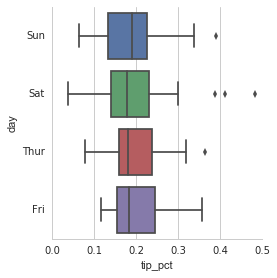

In [40]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])